Modelisation de l'evolution de la repartition des richesses sur une zone A, B et C

Dans cette partie, on cherche à comprendre les raisons et les facteurs qui decrivent l'évolution du nombre de millionaires dans 3 zones distincts tel que chacunes possedent des avantages ou/et inconvéniants, ainis que comprendre le role de chaque facteur. 
La zone A est definie par une zone peu stable (en securité et/ou education), tandis que la zone B est une zone fiable au niveau de la securité et de l'éducation mais avec des conditions fiscales peu avantageuses, la zone C ayant les memes avantages que la zone B mais des conditions fiscales relativement avantageuses.

Comment evolue la repartition des individus riches (on considere les personnes ayant un patrimoine superieure à 1 million d'euros), et quels sont les differents facteurs qui influent sur cette evolution ?

Nous avons pu tenter de resoudre ce probleme en nous inspirant des differents travaux de Thomas Piketty ainsi que les differents chiffres et taux trouvés lors de nos recherches. 

Partie 1 : 
    Analyse des equations d'etats dans les zones A et B 

L'equation qui suit represente l'evolution du nombre de millionnaires dans la zone A sans compter les departs uniquement au sein de cette zone 

In [251]:
def var_etat_A(PIB, nb_init) :
    """int * int -> int
    retourne l'evolution du nombres de millionaires au lieu A de t a t+1"""

    #nb : int
    nb = 0 

    if PIB >= 15000  :
        nb = nb_init * 1.07

    elif PIB <= 4000  :
        nb = nb_init * 1.005
        
    else : 
        nb = nb_init * 1.03


    return int(nb) 

var_etat_A(2700, 1000)

1004

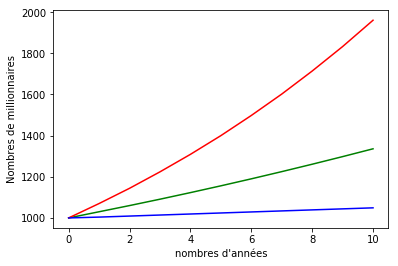

In [252]:
def var_A(PIB, pop_init, n): 
    """int*int*int -> list[int] """
    #A : int
    A = pop_init
    #a : list[int] 
    a = [pop_init]
    #i : int 
    for i in range(0, n) :
        A = var_etat_A(PIB, A)
        a.append(A)
        
    return a

var_A(2000, 100, 10) 


import numpy as np
import matplotlib.pyplot as plt

#PIB1 : int 
PIB1 = 19000
#PIB2 : int 
PIB2 = 9000
#PIB3 : int 
PIB3 = 3000

#pop_init : int 
pop_init = 1000


#A : list[int] 
A = var_A(PIB1, pop_init, 10) 

#B : list[int] 
B = var_A(PIB2, pop_init, 10)

#C : list[int] 
C = var_A(PIB3, pop_init, 10)



plt.figure()
plt.plot(B, "g")
plt.plot(A, "r")
plt.plot(C, "b")
plt.ylabel("Nombres de millionnaires")
plt.xlabel("nombres d'années")

plt.show()



La courbe rouge represente l'evolution du nombres de millionaires dans le cas ou la zone A a un PIB superieure à 15000 dollars par habitants, la courbe en vert, un PIB entre 4000 et 15000 dollars tandis que celle en bleue, un PIB inferieure à 4000 dollars par habitant. 

De part ce graphique, on peut montrer l'importance du PIB d'une zone dans l'evolution theorique du nombres d'individus riches

In [253]:
def var_etat_B( nb_init) :
    """int  -> float
    retourne l'evolution du nombres de millionaires au lieu A de t a t+1"""
    return int (1.1 * nb_init)

In [254]:
def var_B(pop_init, n): 
    """int*int*int -> list[int] """
    #A : int
    A = pop_init
    #a : list[int] 
    a = [pop_init]
    #i : int 
    for i in range(0, n) :
        A = var_etat_B(A)
        a.append(A)
        
    return a

var_B(1000, 10)

[1000, 1100, 1210, 1331, 1464, 1610, 1771, 1948, 2142, 2356, 2591]

On cherche ici à visualiser l'evolution au sein des zones A et B en fonction du PIB, de la population initiale et du nombre d'années.

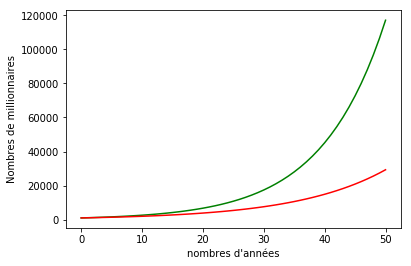

In [255]:

import numpy as np
import matplotlib.pyplot as plt

#PIB : int 
PIB = 19000
#pop_init : int 
pop_init = 1000


#A : list[int] 
A = var_A(PIB, pop_init, 50) 

#B : list[int] 
B = var_B(pop_init, 50)

plt.figure()
plt.plot(B, "g")
plt.plot(A, "r")
plt.ylabel("Nombres de millionnaires")
plt.xlabel("nombres d'années")

plt.show()



On a cherché à montrer que meme dans le meilleur des cas de la zone A (PIB superieur a 15000 dollars par habitants), la croissance de la zone B reste nettement superieure.

Le PIB par habitant joue donc un rôle important dans l'évolution des millionnaires, mais cette nette différence d'évolution entre ces 2 zones est surement aussi liée à d'autres facteurs comme le niveau d'éducation ou la sécurité de la zone par exemple.

In [256]:
def passage_de_A_B (ind_eduA, ind_eduB, ind_secA, ind_secB) :
    
    """float**4 -> float
    calcul la probabilité qu'un millionaires qui quitte son pays A pour vivre vers B en fonction des
    conditions sociales de A et de B """
    
    #ind_social_A : float
    ind_social_A = ind_eduA + ind_secA

    #ind_social_B : float
    ind_social_B = ind_eduB + ind_secB

    #prob_A_vers_B : float
    prob_A_vers_B = 0.0 

    if ind_social_A < 110 and ind_social_A > 80 :
        if  ind_social_B > ind_social_A and ind_social_B < 160 :
             prob_A_vers_B = 0.02

        else :
            if ind_social_B > 160 :
                prob_A_vers_B = 0.035

    else :
        if  ind_social_B > ind_social_A and ind_social_B < 160 :
             prob_A_vers_B = 0.13

        else :
            if ind_social_B > 160 : 
                prob_A_vers_B = 0.32
            
    return prob_A_vers_B



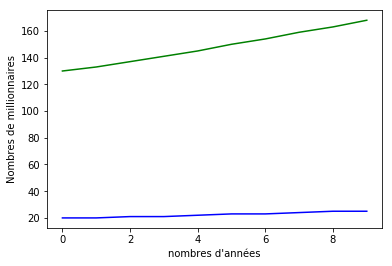

In [257]:
import numpy as np
import matplotlib.pyplot as plt

#PIB : int 
PIB = 6000
#pop_init : int 
pop_init = 1000

def liste_depart(n, pop_init, ind_secuA, ind_eduA, ind_secuB, ind_eduB) : 
    """int * int * (float ** 4) -> liste[int]"""
    #res : liste[int]
    res = [] 
    #i : int 
    for i in range(0, n) : 
        res.append(int(var_A(PIB, pop_init, n)[i] *  passage_de_A_B (ind_eduA, ind_eduB, ind_secA, ind_secB)) )
        
    return res

#A : list[int] 
A = liste_depart(10, pop_init, 20, 20, 93, 91)

#B : list[int] 
B = liste_depart(10, pop_init, 50, 50, 93, 91)

#C : list[int]
C = liste_depart(10, pop_init, 10, 25, 99, 81)


plt.figure()
plt.plot(B, "b")

plt.plot(A, "g")



plt.ylabel("Nombres de millionnaires")
plt.xlabel("nombres d'années")

plt.show()



Partie 2 : 
    Analyse des probabilités de depart de A vers B et de B vers C

In [258]:
def passage_de_B_C (taux_impotB, taux_impotC, ind_eduC, ind_secC, patrimoine) : 
    """ float ** 5 -> float
    retourne la probabilité qu'un millionaire de la zone B (zone developpée) aille vivre sur C pour des raisons
    fiscales mais aussi eduction et niveau de vie"""

    #ind_social_C : float
    ind_social_C = ind_eduC + ind_secC

    #prob_B_vers_C : float
    prob_B_vers_C = 0.0


    if patrimoine <= 10.0 and patrimoine >= 1.0 : 
        if taux_impotB >= 0.55 and taux_impotC < 0.2 :
            if ind_social_C > 160.0:
              prob_B_vers_C = 0.08
            else :
              prob_B_vers_C = 0.02
              
        else :
            if taux_impotC <= taux_impotB - 0.15 :
                if ind_social_C > 160.0:
                  prob_B_vers_C = 0.06
                else :
                  prob_B_vers_C = 0.011


    
    else : 
        if taux_impotB >= 0.6 and taux_impotC <= taux_impotB - 0.15 :
            if ind_social_C > 160 :
              prob_B_vers_C = 0.11
            else :
              prob_B_vers_C = 0.008
              
        if taux_impotB > 0.4 and taux_impotB < 0.6 and taux_impotC <= taux_impotB - 0.15:
            if ind_social_C > 160 :
              prob_B_vers_C = 0.05
            else :
              prob_B_vers_C = 0.005
            

    return prob_B_vers_C

Partie 3 : UN MODELE REALISTE 

In [259]:

#int : patrimoine
patrimoine =  2

#int : nb_A 
nb_A= 1000
#int : nb_B 
nb_B= 1000
#int : nb_C
nb_C= 1000

#int : PIB
PIB = 2000

#float : ind_eduA, ind_eduB, ind_secA, ind_secB
ind_eduA = 27.8
ind_eduB = 89
ind_secA = 37
ind_secB = 64

#float : taux_impotB, taux_impotC, ind_eduC, ind_secC
taux_impotB = 0.5
taux_impotC = 0.15
ind_eduC = 75.6
ind_secC = 88.4



In [260]:

def evolution_tot(n) :
    """ int-> dict[str : int]
    retourne le nombre de riches en A, B, C au bout de n années """
    
    #int : n_final_A
    n_final_A = nb_A
    #int : n_final_B
    n_final_B = nb_B
    #int : n_final_C
    n_final_C = nb_C
    #res : dict[str : int]
    res = dict() 
    
    #i : int 
    for i in range(0, n) :
        
        n_final_A = var_etat_A(PIB, n_final_A)
        n_final_A = n_final_A - n_final_A * passage_de_A_B (ind_eduA, ind_eduB, ind_secA, ind_secB)
        
        
        n_final_B = var_etat_B(n_final_B)
        n_final_B = n_final_B  - (n_final_B  * passage_de_B_C (taux_impotB, taux_impotC, ind_eduC, ind_secC, patrimoine)) + var_etat_A(PIB, nb_A) * passage_de_A_B (ind_eduA, ind_eduB, ind_secA, ind_secB)
        
        
        n_final_C = n_final_C + n_final_B  * passage_de_B_C (taux_impotB, taux_impotC, ind_eduC, ind_secC, patrimoine)
       


    res["A"] = int(n_final_A)
    res["B"] = int(n_final_B)
    res["C"] = int(n_final_C)

    return res

evolution_tot(1)

{'A': 873, 'B': 1164, 'C': 1069}

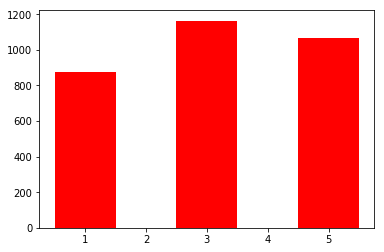

In [261]:
import matplotlib.pyplot as plt
import numpy as np

#dict[char : int] : res
res = evolution_tot(1)

fig = plt.figure()

x = [1,2, 3, 4, 5]
height = [res["A"],0,  res["B"],0 ,res["C"]]
width = 1.0

plt.bar(x, height, width, color='r' )


plt.savefig('SimpleBar.png')
plt.show()

In [1]:
print("Pas d'inception stp")

Pas d'inception stp


On pourrait donc maintenant conclure qu'un pays tel que la Cote d'Ivoire, L'Egypte, ... sont des pays qui malgré une evolution interne du nombres de millionaires qui ne cessent de croitre, les taux de departs pour des pays "occidentaux" tels que la France, la Grande Bretagne ou encore les USA, sont trop importants. Ainsi, l'evolution totale de tels pays (Zone A) sont en constantes baisses a cause en grande partie aux differents facteurs geopolitiques (Guerres, Embargos, ...) 

Ensuite, la zone B pourrait en realité representé un pays tel que le notre, qui a une incroyable croissance au niveau du nombres de millionaires, mais a cause de differentes raisons fiscales de nombreux riches la quittent pour des pays plus avantageux d'un point de vue economique (la zone C). 